In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Which of $k$ chip brands sold at a convenience store are "the best"?

Let $\mathbf x^{(t)}$ be a length $k$ vector counting the number of each kind of chip brand purchased by time $t$ (relative to some start time) on a given day. Assume $\mathbf x$ follows the ***multinomial distribution*** (with $t$ omitted for brevity)

$$p(\mathbf x | \mathbf p) = {\displaystyle {\frac {n!}{x_{1}!\cdots x_{k}!}}p_{1}^{x_{1}}\cdots p_{k}^{x_{k}}}$$

> A ***multinomial distribution*** generalizes the ***binary outcome*** of the ***binomial distribution*** to a ***categorical outcome***. So, a ***multinomial random variable*** also consists of $n$ "trials", but now there are $k$ possible outcomes as opposed to two ("success" or "failure"), and the observed nubmer of each of these outcomes (out of $n$ "trials") are recorded in $\mathbf x$.
> - The ***multinomial distribution*** is parameterized by a "probability vector" $\mathbf p$ of length $k$ which satisfies $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$) and where $p_j$ specifies the probabilities of the $j^{th}$ outcome of the $k$ categorical outcomes modeled by the ***multinomial distribution***.

The ***Dirichlet distribution*** has the form (again omitting $t$ for brevity)

$$f(\mathbf p | \boldsymbol\alpha) = \frac{1}{\mathrm{B}(\boldsymbol\alpha)} \prod_{j=1}^k p_j^{\alpha_j - 1} \quad E[p_j] = \frac{\alpha_j}{\sum_{j=1}^k \alpha_j} \quad \text{Var} [p_j]=\frac {E[p_j](1-E[p_j])}{1 + \sum_{j=1}^k \alpha_j} \quad \text{Cov}_{j\neq i}[p_j,p_i]=-\frac {E[p_j]E[p_i]}{1 + \sum_{j=1}^k \alpha_j}$$

and models a probability vector over a ***simplex***, meaning that $\sum_{j=1}^k p_j = 1$ (and $p_j \geq 0$ for all $j$).

> A ***Dirichlet distribution*** generalizes a ***beta distribution*** which models a "probability-valued" ***random variable*** which takes on values between $0$ and $1$. So, a ***Dirichlet random variable*** $\mathbf p$ is a vector of $k$ "probabilities" which sum to $1$.
> - The ***Dirichlet distribution*** is parameterized by the length $k$ vector $\boldsymbol\alpha$ where $\alpha_j>0$ for all $j$. As indicated by the expectation, variance, and covariance formulas above, the $\boldsymbol\alpha$ parameter vector controls the behavior of the actualizations of a ***Dirichlet random variable*** $\mathbf p$.  

In [9]:
# Example draw for n=10 from a Multinomial distribution
stats.multinomial(p=[0.2,0.5,0.2,0.1], n=10).rvs(size=1)[0]
# You can re-run the cell a few times to see example actualizations
# of this multinomial random variable, and note it's relationship to `n`

array([0, 8, 2, 0])

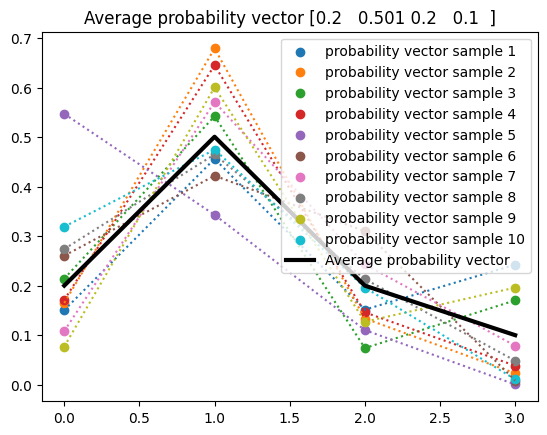

In [5]:
# Example draws from a Dirichlet distribution
plt.figure()
for i in range(10):
    p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=1)[0]; plt.plot(p, ':')
    plt.scatter(x=[0,1,2,3], y=p, label="probability vector sample "+str(i+1))

p = stats.dirichlet(alpha=[2,5,2,1]).rvs(size=100000).mean(axis=0)
plt.plot(p, 'k', linewidth=3, label="Average probability vector");
plt.title("Average probability vector "+str(p.round(3))); plt.legend();

1. [1/2 points] Using the "chips example", describe how the sequence $\mathbf x^{(t)}$ would generally behave over time $t$ assuing time $t=0$ is when the convenience store begins counting chip purchases.

Given sample probabilities presented above (0.2,0.5,0.2, 0.1), over time t, $\mathbf x^{(t)}$ would start at 0, and as time progressed, you would expect the chip with probability of 0.2 to be purchased 20% of the time, chip with probability 0.5 to be purchased 50% of the time, and so on. If 10000 chips were to be purchased over time t, we would expect the first chip to be sold approximately 2000 times, the second chip approx. 5000 times, third chip approx. 2000 times, and fourth chip approx. 1000 times. These could be replaced with any set of probabilities with the main takeaways being the same.

2. [1/2 points] Specify the distribution $p(\mathbf p | \mathbf x^{(t)})$, your belief about the "best chips" at time $t$ according to a Bayesian analysis.


The distribution $p(\mathbf p | \mathbf x^{(t)})$ represents the posterior distribution at time t based on the n chips that have been sold, and is dirichlet. This is due to the fact that the posterior is proportional to my prior being the dirichlet distribution multiplied by the likelihood given by the multinomial distribution to arrive at the posterior distribution, which is also a dirichlet distribution.

3. [1/2 point] Provide code which samples from $p(p_j|\mathbf x^{(t)}=[2,5,2,1])$ which is one of the marginal distributions of $p(\mathbf p | \mathbf x^{(t)}=[2,5,2,1])$.

- Hint 1: You do not have to analytically derive $p(p_j|\mathbf x^{(t)})$. You can sample from it just based on sampling from $p(\mathbf p | \mathbf x^{(t)})$.
- Hint 1: The $\alpha_j$ of the previous question now actually require chosen values. Use $1$ for each.

In [19]:
alpha=np.array([1, 1, 1, 1])
x = np.array([2, 5, 2, 1])
alpha_update = alpha + x
sampling = np.random.dirichlet(alpha_update)
sampling

array([0.1360956 , 0.54012195, 0.13038672, 0.19339573])

4. [1/2 point] Provide code which estimates $\Pr(p_j>q|\mathbf x^{(t)}=[2,5,2,1])$ for some $q$ between $0$ and $1$.

In [20]:
samples = np.random.dirichlet(sampling, size=100000)
q=0.1
num_1=0
num_2=0
num_3=0
num_4=0
for i in samples:
  for j in range(len(i)):
    if j==0 and i[j]>q:
      num_1+=1
    elif j==1 and i[j]>q:
      num_2+=1
    elif j==2 and i[j]>q:
      num_3+=1
    elif j==3 and i[j]>q:
      num_4+=1

p_1=num_1/100000
p_2=num_2/100000
p_3=num_3/100000
p_4=num_4/100000

p_1, p_2, p_3, p_4

# this can be done with for loops, or something like `...rvs(size=100000)[:,j]`

(0.28949, 0.82826, 0.27818, 0.39667)

5. [1/2 point] Provide an interval quantifying your posterior uncertainty about the value of $p_j|\mathbf x^{(t)}=[2,5,2,1]$.


In [21]:
np.percentile(samples[:, 0], [2.5, 97.5])

array([1.9890111e-12, 8.8479451e-01])

6. [1/2 point] Provide code which estimates $\Pr(p_j>p_{j'}|\mathbf x^{(t)}=[2,5,2,1])$ for $j\neq j'$.

In [23]:
#Let j=0 and j prime = 1. Can set them to any value and yield the same results

count=0

for i in samples:
    if i[0]>i[1]:
      count+=1

count/100000

0.18272

7. [1/2 points] Provide python code to sample from the distribution of $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $\frac{p_j}{p_{j'}}$.


In [25]:
np.percentile(count/(10000-count), [2.5, 97.5])

array([-2.20889749, -2.20889749])

8. [1/2 points] Provide python code to sample from the distribution of $p\left(p_j - p_{j'} | \mathbf x^{(t)} =[2,5,2,1] \right)$ and provide an interval estimate quantifying your belief about the value of $p_j - p_{j'}$.

In [26]:
np.percentile(count-(10000-count), [2.5, 97.5])

array([26544., 26544.])

9. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ why are both $p\left(\frac{p_j}{p_{j'}} | \mathbf x^{(t)}\right)$? and $p\left(p_j - p_{j'} | \mathbf x^{(t)} \right)$ relevant? What's different between these for $(j,j')=(2,3)$ as opposed to $(j,j')=(4,5)$?


One of these speaks to the independence of the two events while the other speaks to the strict magnitude of the probabilities. The difference between (2,3) and (4,5) is that since (4,5) probabilities are so small, there might be some certain amount of dependence between the two that is important to note that might not be nearly as clear in the (2,3) case.

10. [1/2 points] If the actual true $\mathbf p = [p_1=0.397, p_2=0.4, p_3=0.2, p_4=0.002, p_5=0.001]$ what should be true about $t$ if we are examining
$p\left(\frac{p_4}{p_{5}} | \mathbf x^{(t)}\right)$ or $p\left(p_4 - p_{5} | \mathbf x^{(t)} \right)$?

Hint: refer back to problem 1.


If these are the true values, at time t we should see that both 4 and 5 are non-zero, and furthermore, that 4 is strictly greater than 5.